In [217]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [218]:
data = pd.read_csv("Customertravel.csv")
#check data
data.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,Churns
0,34,No,Middle Income,6,No,Yes,0,No
1,34,Yes,Low Income,5,Yes,No,1,Yes
2,37,No,Middle Income,3,Yes,No,0,No
3,30,No,Middle Income,2,No,No,0,No
4,30,No,Low Income,1,No,No,0,No


In [158]:
data.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target', 'Churns'],
      dtype='object')

In [159]:
data.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia     int64
BookedHotelOrNot               int64
Target                         int64
Churns                        object
dtype: object

In [161]:
data1 = data[data.FrequentFlyer!='No Record']

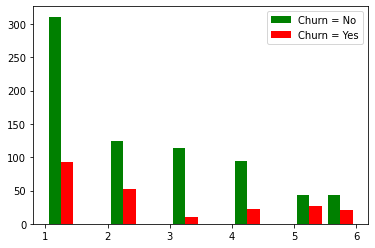

In [45]:
#find customer still live
ServicesOpted_churn_no = data[data.Churns =='No'].ServicesOpted
ServicesOpted_churn_yes = data[data.Churns =='Yes'].ServicesOpted

plt.hist([ServicesOpted_churn_no, ServicesOpted_churn_yes], 
         color = ['green', 'red'],
         label = ['Churn = No','Churn = Yes'])
plt.legend()

In [162]:
def print_unique_col_values(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column} : {data[column].unique()}')


In [163]:
print_unique_col_values(data1)

FrequentFlyer : ['No' 'Yes']
AnnualIncomeClass : ['Middle Income' 'Low Income' 'High Income']
AccountSyncedToSocialMedia : ['No' 'Yes']
BookedHotelOrNot : ['Yes' 'No']
Churns : ['No' 'Yes']


In [164]:
yes_no_columns = ['FrequentFlyer','AccountSyncedToSocialMedia','BookedHotelOrNot','Churns']

for col in yes_no_columns:
    data1[col].replace({'Yes':1,'No':0}, inplace = True)

C:\Users\atjim\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [165]:
for column in data1:
    print(f'{column} : {data1[column].unique()}')


Age : [34 37 30 27 36 28 31 38 33 35 29]
FrequentFlyer : [0 1]
AnnualIncomeClass : ['Middle Income' 'Low Income' 'High Income']
ServicesOpted : [6 5 3 2 1 4]
AccountSyncedToSocialMedia : [0 1]
BookedHotelOrNot : [1 0]
Target : [0 1]
Churns : [0 1]


In [173]:
data2 = pd.get_dummies(data=data1, columns=['AnnualIncomeClass'])
data2.columns

Index(['Age', 'FrequentFlyer', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'Target', 'Churns', 'AnnualIncomeClass_High Income',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [174]:
data2.sample(2)

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,Churns,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
15,37,1,6,0,1,0,0,0,1,0
412,30,0,4,1,0,0,0,0,1,0


In [176]:
data2.dtypes

Age                                int64
FrequentFlyer                      int64
ServicesOpted                      int64
AccountSyncedToSocialMedia         int64
BookedHotelOrNot                   int64
Target                             int64
Churns                             int64
AnnualIncomeClass_High Income      uint8
AnnualIncomeClass_Low Income       uint8
AnnualIncomeClass_Middle Income    uint8
dtype: object

In [178]:
cols_to_scale = ['Age']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [183]:
data2.sample(5)

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,Churns,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
840,0.272727,0,6,0,1,0,0,0,0,1
923,0.272727,0,4,0,0,0,0,0,0,1
953,0.363636,1,1,0,0,0,0,1,0,0
472,0.272727,0,1,1,1,0,0,0,1,0
574,0.363636,0,1,0,0,0,0,0,1,0


In [181]:
for column in data2:
    print(f'{column} : {data2[column].unique()}')

Age : [0.63636364 0.90909091 0.27272727 0.         0.81818182 0.09090909
 0.36363636 1.         0.54545455 0.72727273 0.18181818]
FrequentFlyer : [0 1]
ServicesOpted : [6 5 3 2 1 4]
AccountSyncedToSocialMedia : [0 1]
BookedHotelOrNot : [1 0]
Target : [0 1]
Churns : [0 1]
AnnualIncomeClass_High Income : [0 1]
AnnualIncomeClass_Low Income : [0 1]
AnnualIncomeClass_Middle Income : [1 0]


In [184]:
x = data2.drop('Churns', axis = 'columns')
y = data2['Churns']

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [188]:
x_train.shape

(715, 9)

In [190]:
x_test.shape

(179, 9)

In [195]:
len(x_train.columns)

9

In [209]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape =(9,), activation ='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7245
Epoch 2/100
23/23 [==============================] - 0s 714us/step - loss: 0.6311 - accuracy: 0.7664
Epoch 3/100
23/23 [==============================] - 0s 696us/step - loss: 0.5973 - accuracy: 0.7818
Epoch 4/100
23/23 [==============================] - 0s 714us/step - loss: 0.5643 - accuracy: 0.7860
Epoch 5/100
23/23 [==============================] - 0s 739us/step - loss: 0.5304 - accuracy: 0.7944
Epoch 6/100
23/23 [==============================] - 0s 739us/step - loss: 0.4913 - accuracy: 0.8098
Epoch 7/100
23/23 [==============================] - 0s 739us/step - loss: 0.4508 - accuracy: 0.8336
Epoch 8/100
23/23 [==============================] - 0s 739us/step - loss: 0.4106 - accuracy: 0.8615
Epoch 9/100
23/23 [==============================] - 0s 739us/step - loss: 0.3722 - accuracy: 0.8643
Epoch 10/100
23/23 [==============================] - 0s 739us/step - loss: 0.3337 - accuracy

23/23 [==============================] - 0s 652us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 652us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 652us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 695us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 652us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 608us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 608us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 678us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 652us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 90/100
23/23 [==============================] - 0s 652us/step - loss: 0.0032 - accuracy: 

In [210]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 833us/step - loss: 0.0028 - accuracy: 1.0000


[0.0028130158316344023, 1.0]

In [211]:
yp = model.predict(x_test)
yp[:5]

array([[9.9701959e-01],
       [4.9912930e-04],
       [2.3101270e-03],
       [5.1608682e-03],
       [7.7196956e-04]], dtype=float32)

In [212]:
y_test[:5]

633    1
543    0
641    0
509    0
30     0
Name: Churns, dtype: int64

In [213]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [219]:
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [220]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        43

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(69.0, 0.5, 'Truth')

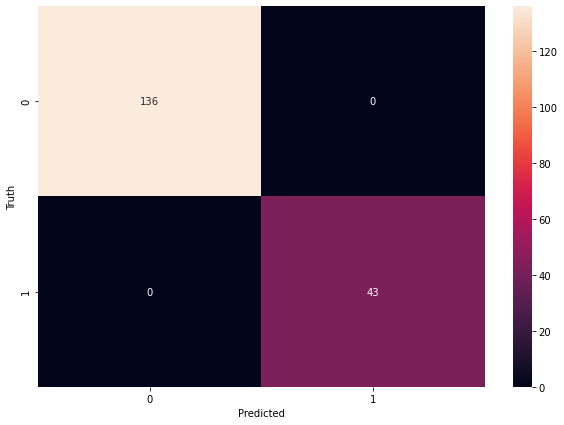

In [222]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [223]:
y_test.shape

(179,)